# Scraping web de vídeo de Youtube para análisis de sentimientos

In [ ]:
# Instalar las librerías necesarias
!pip install --upgrade google-api-python-client

# Importar las librerías
from googleapiclient.discovery import build
api_key = 'TU API'

# ID del video de YouTube
video_id = 'TU ID'

# Inicializar el cliente de la API de YouTube
youtube = build('youtube', 'v3', developerKey=api_key)

def get_comments(youtube, video_id):
    comments = []

    # Solicitar comentarios
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText'
    )

    while request:
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        # Comprobar si hay más páginas de comentarios
        if 'nextPageToken' in response:
            request = youtube.commentThreads().list(
                part='snippet',
                videoId=video_id,
                textFormat='plainText',
                pageToken=response['nextPageToken']
            )
        else:
            request = None

    return comments

# Obtener los comentarios del video
comments = get_comments(youtube, video_id)

# Mostrar los comentarios
for i, comment in enumerate(comments, 1):
    print(f"Comentario {i}: {comment}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.155.0
    Uninstalling google-api-python-client-2.155.0:
      Successfully uninstalled google-api-python-client-2.155.0


Comentario 1: 🎁 Clase gratis “Descubre la nueva profesión”: https://bit.ly/3TcgGFN
Comentario 2: ESPAÑA DESPIERTA o toda esa bazofia corrupta y sus cómplices bilduetarras nos convertirá en una pocilga comunista bananera
Comentario 3: Mi podcast favorito hasta ahora 😍❤️
Comentario 4: WORLDCA$TON!
Comentario 5: Gran conversación.
Saludos de Uruguay.
Comentario 6: Dos Jabalies pelo grueso hablando de verdades
Comentario 7: La triada es psicopatía, maquiavelismo y narcisismo
Comentario 8: Apoyo lo que dicen, por la mera razón que si las personas tuvieran un poco más de pensamiento crítico y no se dejaran llevar como borregos, la cantidad de personas que piensan como ellos y como pienso yo sería mayoría no minoría , pero es más fácil tener una sociedad dormida.
Comentario 9: Gracias chicos por decir las cosas tan claras. Quien no las entienda tiene un problema.
Comentario 10: Aver estoy de acuerdo con la imigracion ilegal porque elos yo somos imigrantes pero legales venimos a trabajar y ahi

In [ ]:
# Instalar las librerías necesarias
!pip install --upgrade google-api-python-client

# Importar las librerías
import csv
from googleapiclient.discovery import build
api_key = 'TU API'

# ID del video de YouTube
video_id = 'TU ID'

# Inicializar el cliente de la API de YouTube
youtube = build('youtube', 'v3', developerKey=api_key)

def get_comments(youtube, video_id):
    comments = []
    total_comments = 0  # Para contar el número total de comentarios

    # Solicitar los comentarios
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText',
        maxResults=100  # Obtener hasta 100 comentarios por página
    )

    while request:
        response = request.execute()

        # Extraer los comentarios
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
            total_comments += 1

        # Comprobar si hay más páginas de comentarios
        if 'nextPageToken' in response:
            request = youtube.commentThreads().list(
                part='snippet',
                videoId=video_id,
                textFormat='plainText',
                pageToken=response['nextPageToken'],
                maxResults=100  # Continuar pidiendo hasta 100 comentarios por página
            )
        else:
            request = None  # No hay más páginas

    print(f"Total de comentarios extraídos: {total_comments}")
    return comments

# Obtener los comentarios del video
comments = get_comments(youtube, video_id)

# Verificar si se descargaron todos los comentarios
print(f"Total de comentarios descargados: {len(comments)}")

# Guardar los comentarios en un archivo CSV
csv_filename = '/content/comentarios_youtube.csv'  # Ruta del archivo CSV

# Escribir los comentarios en el archivo CSV
with open(csv_filename, mode='w', newline='', encoding='UTF-16') as file:
    writer = csv.writer(file)

    # Escribir el encabezado
    writer.writerow(["Comentario"])

    # Escribir cada comentario en una fila
    for comment in comments:
        writer.writerow([comment])

print(f"Comentarios guardados en {csv_filename}")


Total de comentarios extraídos: 763
Total de comentarios descargados: 763
Comentarios guardados en /content/comentarios_youtube.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                          Comentario  sentimiento
0  🎁 Clase gratis “Descubre la nueva profesión”: ...            1
1  ESPAÑA DESPIERTA o toda esa bazofia corrupta y...            0
2                Mi podcast favorito hasta ahora 😍❤️            2
3                                       WORLDCA$TON!            0
4            Gran conversación.\nSaludos de Uruguay.            2

Medidas estadísticas sobre los sentimientos:
Media: -0.010484927916120577
Mediana: 0.0
Máximo: 13
Mínimo: -34
Desviación estándar: 3.5891196254508064
Suma total de sentimientos: -8

Distribución de los sentimientos:
tipo_sentimiento
Neutro      318
Negativo    238
Positivo    207
Name: count, dtype: int64


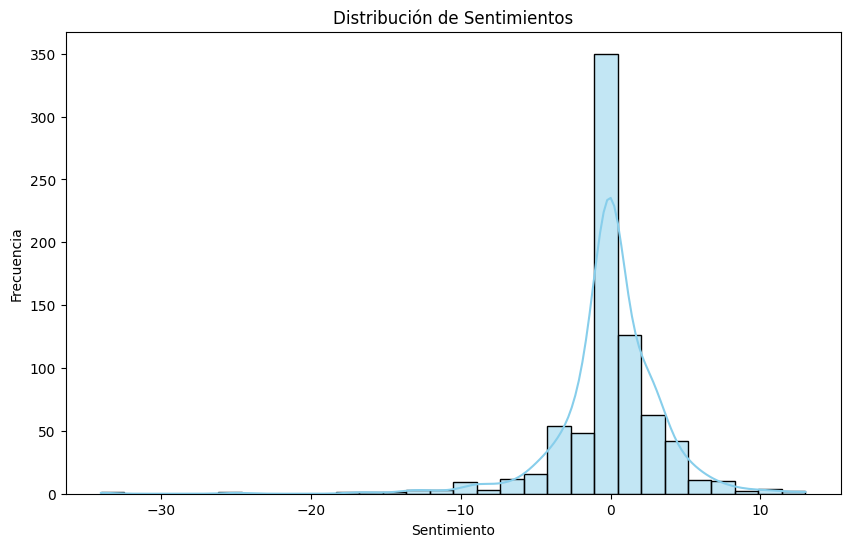

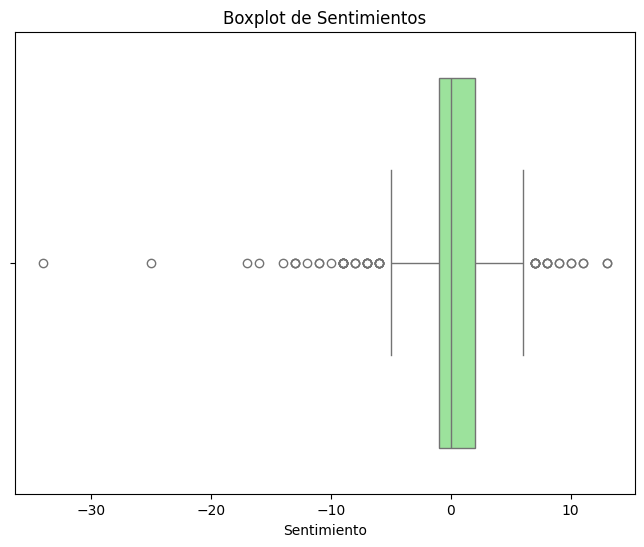

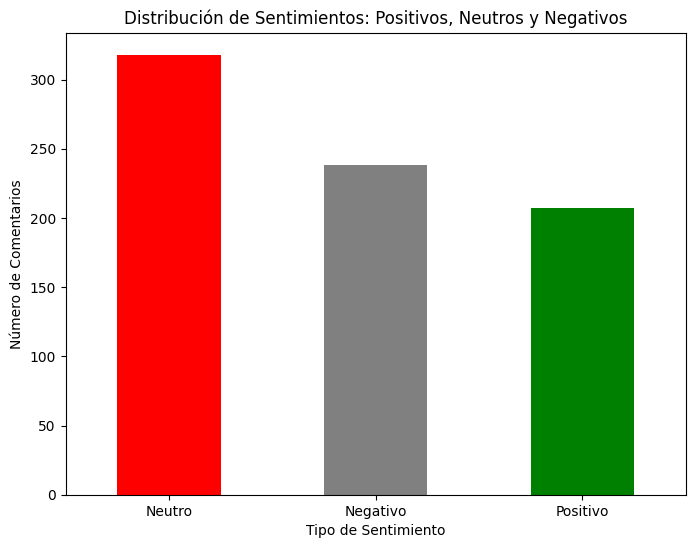

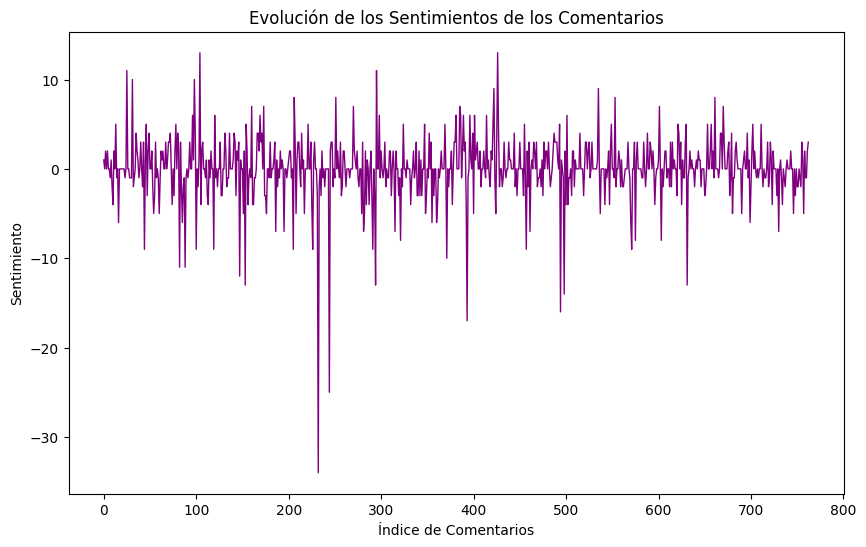

Archivo CSV con análisis de sentimientos guardado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Montar Google Drive para acceder a los archivos
from google.colab import drive
drive.mount('/content/drive')

# Paso 2: Función para cargar el diccionario de sentimientos desde un archivo .txt
def cargar_diccionario_sentimientos(archivo_txt):
    diccionario = {}
    with open('/content/drive/MyDrive/AFINN_es.txt', 'r', encoding='utf-8') as file:
        for linea in file:
            partes = linea.strip().split()  # Separar palabra y puntaje
            if len(partes) == 2:
                palabra, puntaje = partes
                diccionario[palabra] = int(puntaje)  # Almacenar en el diccionario
    return diccionario

# Paso 3: Función para calcular el sentimiento de un comentario
def calcular_sentimiento(comentario, diccionario):
    comentario = comentario.lower()  # Convertir el comentario a minúsculas
    puntaje_sentimiento = 0
    palabras = comentario.split()  # Dividir el comentario en palabras

    # Sumar los puntajes de las palabras que están en el diccionario
    for palabra in palabras:
        if palabra in diccionario:
            puntaje_sentimiento += diccionario[palabra]

    return puntaje_sentimiento

# Paso 4: Cargar el diccionario de sentimientos desde Google Drive
diccionario_sentimientos = cargar_diccionario_sentimientos('/content/drive/MyDrive/AnalisisSentimientos/AFINN-111_es.txt')

# Paso 5: Cargar el archivo CSV con los comentarios desde Google Drive
df = pd.read_csv('/content/drive/MyDrive/comentarios_youtube.csv', encoding='UTF-16')

# Paso 6: Aplicar la función de análisis de sentimientos a cada comentario
df['sentimiento'] = df['Comentario'].apply(lambda x: calcular_sentimiento(x, diccionario_sentimientos))

# Paso 7: Mostrar los resultados
print(df.head())  # Imprimir las primeras filas para revisar los datos

# Medidas estadísticas
media_sentimiento = df['sentimiento'].mean()
mediana_sentimiento = df['sentimiento'].median()
max_sentimiento = df['sentimiento'].max()
min_sentimiento = df['sentimiento'].min()
desviacion_estandar_sentimiento = df['sentimiento'].std()
suma_sentimiento = df['sentimiento'].sum()

# Mostrar las estadísticas calculadas
print("\nMedidas estadísticas sobre los sentimientos:")
print(f"Media: {media_sentimiento}")
print(f"Mediana: {mediana_sentimiento}")
print(f"Máximo: {max_sentimiento}")
print(f"Mínimo: {min_sentimiento}")
print(f"Desviación estándar: {desviacion_estandar_sentimiento}")
print(f"Suma total de sentimientos: {suma_sentimiento}")

# Paso 8: Análisis de los sentimientos positivos, negativos y neutros
# Definir los umbrales para sentimientos positivos, negativos y neutros
umbral_positivo = 1
umbral_negativo = -1

# Clasificar los sentimientos
df['tipo_sentimiento'] = pd.cut(df['sentimiento'], bins=[-np.inf, umbral_negativo, umbral_positivo, np.inf], labels=['Negativo', 'Neutro', 'Positivo'])

# Mostrar la distribución de los sentimientos
print("\nDistribución de los sentimientos:")
print(df['tipo_sentimiento'].value_counts())

# Paso 9: Graficar los resultados

# Histograma de los sentimientos
plt.figure(figsize=(10, 6))
sns.histplot(df['sentimiento'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de los sentimientos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sentimiento'], color='lightgreen')
plt.title('Boxplot de Sentimientos')
plt.xlabel('Sentimiento')
plt.show()

# Gráfico de barras de los sentimientos positivos, negativos y neutros
plt.figure(figsize=(8, 6))
df['tipo_sentimiento'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribución de Sentimientos: Positivos, Neutros y Negativos')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=0)
plt.show()

# Gráfico de la evolución de los sentimientos a lo largo de los comentarios (si se desea)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentimiento'], color='purple', linewidth=1)
plt.title('Evolución de los Sentimientos de los Comentarios')
plt.xlabel('Índice de Comentarios')
plt.ylabel('Sentimiento')
plt.show()

# Paso 10: Guardar los resultados en un nuevo archivo CSV con la columna de tipo de sentimiento
df.to_csv('/content/drive/MyDrive/comentarios_youtube_con_sentimiento.csv', index=False, encoding='UTF-16')
print("Archivo CSV con análisis de sentimientos guardado.")
